**What is Prostate cancer?**

Prostate cancer is a form of cancer that develops in the prostate gland.

**In Brief:**

A cancer in a man's prostate, a small walnut-sized gland that produces seminal fluid.
A man's prostate produces the seminal fluid that nourishes and transports sperm.
Symptoms include difficulty with urination, but sometimes there are no symptoms at all.

![CANCER](https://www.mountelizabeth.com.sg/images/default-source/default-album/surgery-prostate-cancer.jpg?sfvrsn=e70a871e_4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prostate-cancer/Prostate_Cancer.csv


**In this study, we tried to predict Prostate Cancer using 6 different algorithm:**
<ol>
    <li>Logistic regression classification</li>
    <li>SVM (Support Vector Machine) classification</li>
    <li>Naive bayes classification</li>
    <li>Decision tree classification</li>
    <li>Random forest classification</li>
    <li>K-Nearest Neighbor classification</li>
</ol>

**Predictor variable use in classifying Prostate and its features**
<ol>
    <li>radius (mean of distances from center to points on the perimeter)</li>
    <li>texture (standard deviation of gray-scale values)</li>
    <li>perimeter</li>
    <li>area</li>
    <li>smoothness (local variation in radius lengths)</li>
</ol>

We measure the study of 7 different algorithms using a confusion matrix.

# IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('/kaggle/input/prostate-cancer/Prostate_Cancer.csv')
print('Dataset :',df.shape)
x = df.iloc[:, [0, 1, 2, 3]].values
df.info()
df[0:10]

Dataset : (100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


# DIAGNOSIS Explanation

**Diagnosis of prostate cancer is based on Type of tumour found in the medical test.**

**Beningn Tumour: Noncancerous**

If the cells are not cancerous, the tumor is benign. It won't invade nearby tissues or spread to other areas of the body (metastasize). A benign tumor is less worrisome unless it is pressing on nearby tissues, nerves, or blood vessels and causing damage.1

﻿ Fibroids in the uterus or lipomas are examples of benign tumors. 
Benign tumors may need to be removed by surgery.

**Malignant Tumour: Cancerous**

Malignant means that the tumor is made of cancer cells, and it can invade nearby tissues. Some cancer cells can move into the bloodstream or lymph nodes, where they can spread to other tissues within the body—this is called metastasis.

Now For Conveinent Purpose Diagnosis Result in the Table Can be Changed to following:

M = '1' Which Indicates diagnosis of Prostate Cancer 
B = '0' which Indicates patient doesn't have Prostate Cancer and not Harmful. 

In [4]:
df['diagnosis_result'] = df['diagnosis_result'].replace(['B'],'0')
df['diagnosis_result'] = df['diagnosis_result'].replace(['M'],'1')

In [5]:
df[['diagnosis_result']] = df[['diagnosis_result']].apply(pd.to_numeric, errors ='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    int64  
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


In [6]:
df['diagnosis_result'].value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

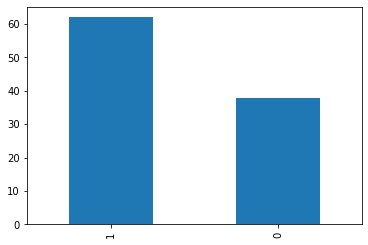

In [7]:
df.diagnosis_result.value_counts()[0:30].plot(kind='bar')
plt.show()

**Distribution of diagnosis 68 benign  38 malignant with Cancer**

# VISUALIZATION

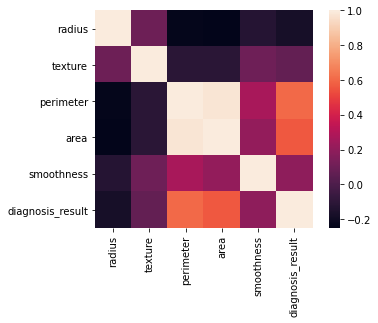

In [8]:
df = df[['radius','texture','perimeter','area', 'smoothness','diagnosis_result']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


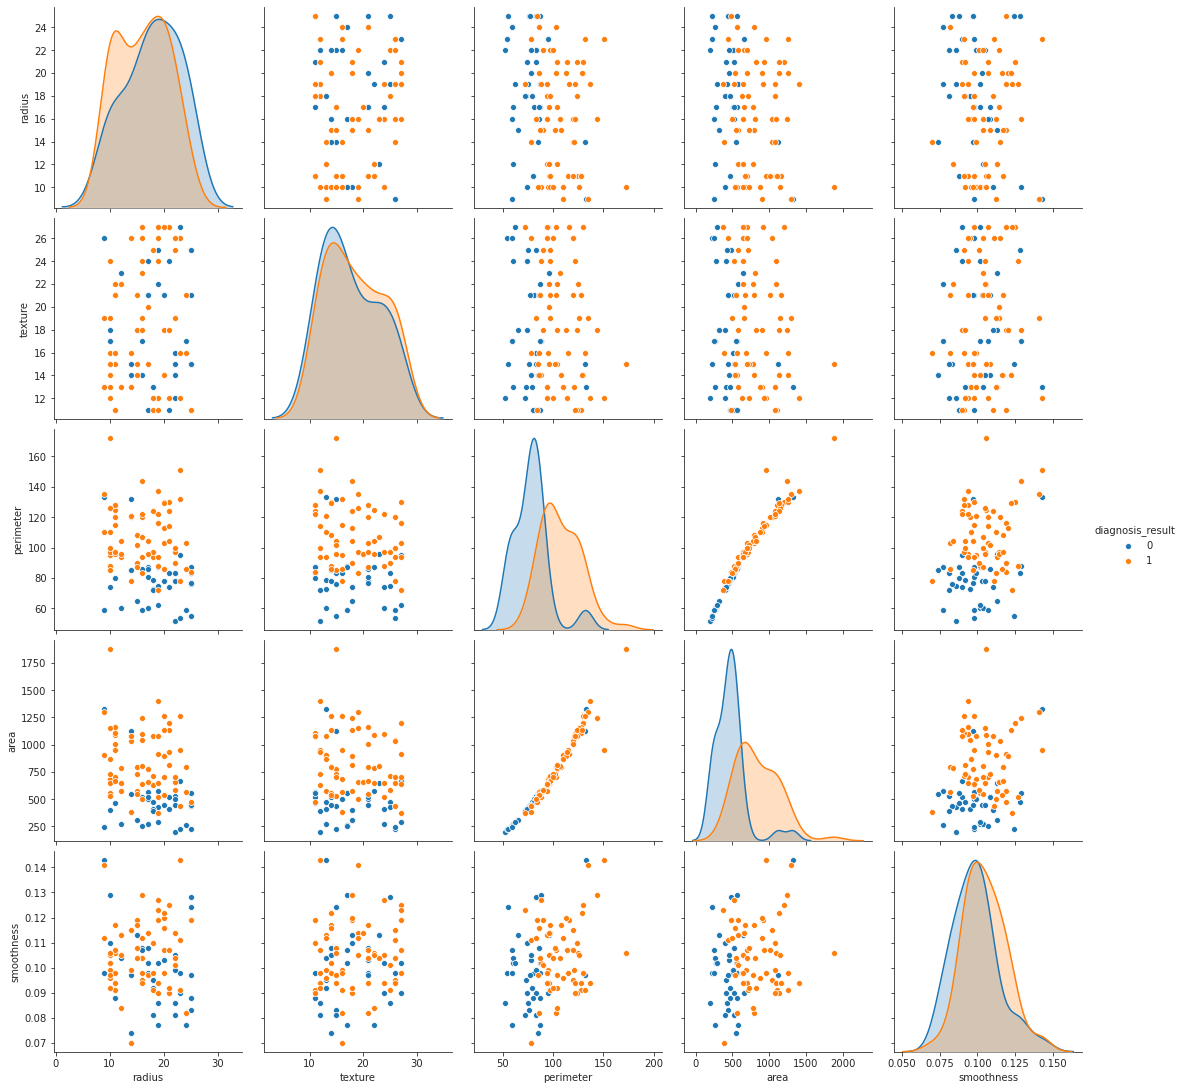

In [9]:
sns.set_style("ticks")
sns.pairplot(df,hue="diagnosis_result",size=3);
plt.show()

Data for training and testing To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 20%, assumed it ideal ratio between training and testing

In [10]:
from sklearn.model_selection import train_test_split
Y = df['diagnosis_result']
X = df.drop(columns=['diagnosis_result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [11]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (80, 5)
Y train shape:  (80,)
X test shape:  (20, 5)
Y test shape:  (20,)


# 1. Logistic regression classification

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input  (X)  belongs to the default class  (Y=1) )  (P(X)=P(Y=1|X)) . In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [12]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

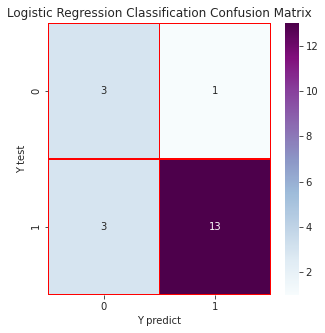

In [13]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [14]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.8


In [15]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict1)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.90


# 2. SVM (Support Vector Machine) classification

SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function)  y=f(x)  between some high-dimensional input vector  x  and scalar output  y . It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set  D=(xi,yi)∈X×Y,i=1 ,  l , where  l  stands for the number of the training data pairs and is therefore equal to the size of the training data set  D , additionally,  yi  is denoted as  di , where  d  stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.

From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True),n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

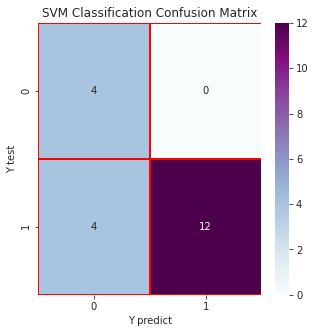

In [17]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [18]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

0.8


In [19]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict2)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.95


# 3. Naive bayes classification

The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem  (P(X|Y)=P(Y|X)P(X)P(Y)) , we can find the probability of  X  happening, given that  Y  has occurred. Here,  Y  is the evidence and  X  is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [20]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

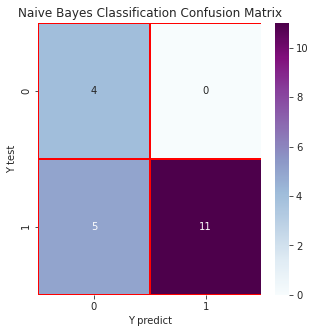

In [21]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [22]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.75


In [23]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict3)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.94


# 4. Decision Tree classification

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively.

In [24]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

In [26]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.8


In [27]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict4)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.90


# 5. Random forest classification

Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

* Let  N  be the number of test cases,  M  is the number of variables in the classifier.
* Let  m  be the number of input variables to be used to determine the decision in a given node;  m<M .
* Choose a training set for this tree and use the rest of the test cases to estimate the error.
* For each node of the tree, randomly choose  m  variables on which to base the decision.
* Calculate the best partition of the training set from the  m  variables.

For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

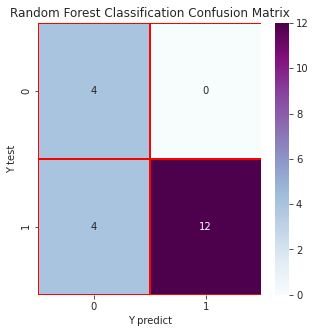

In [29]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [30]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.8


In [31]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.95


# 6. K-Nearest Neighbor classification

K-Nearest neighbors is a technique that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2. For finding closest similar points, find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

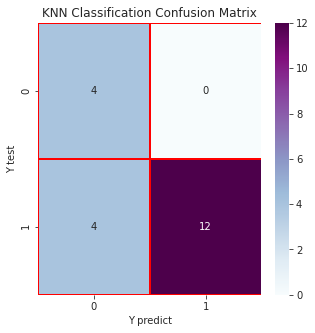

In [33]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [34]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8


In [35]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.95


# Comparison of classification techniques

In [36]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla],index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       0.80
Support Vector Machine Score    0.80
Naive Bayes Score               0.75
Decision Tree Score             0.80
Random Forest Score             0.80
K-Nearest Neighbour Score       0.80
dtype: float64


**ROC curve**

From a Comparison of classification techniques, we plotting ROC to illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

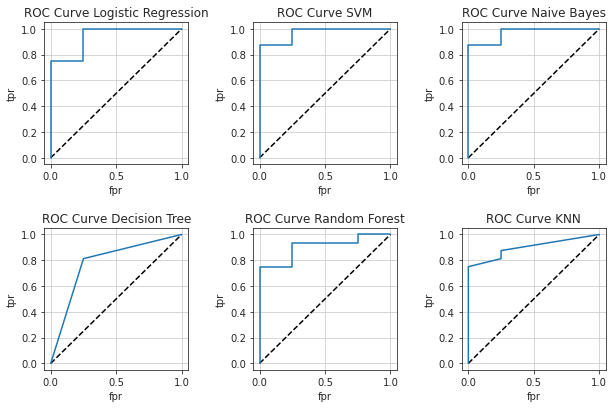

In [37]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# SVM Classification
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()